In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset
data = pd.read_csv('CSAW-CC_breast_cancer_screening_data.csv')


In [3]:
print(data.head())



   anon_patientid  exam_year               anon_filename  x_age  x_case  \
0               2       2015   00002_20990909_L_CC_1.dcm      1       1   
1               2       2015  00002_20990909_L_MLO_1.dcm      1       1   
2               2       2015   00002_20990909_R_CC_1.dcm      1       1   
3               2       2015  00002_20990909_R_MLO_1.dcm      1       1   
4               4       2012   00004_20990909_R_CC_1.dcm      1       0   

  x_cancer_laterality  x_type  x_lymphnode_met  rad_timing  rad_r1  rad_r2  \
0                Left     3.0              0.0         2.0     0.0     0.0   
1                Left     3.0              0.0         2.0     0.0     0.0   
2                Left     3.0              0.0         2.0     0.0     0.0   
3                Left     3.0              0.0         2.0     0.0     0.0   
4                 NaN     NaN              NaN         NaN     0.0     0.0   

   rad_recall  rad_recall_type_right  rad_recall_type_left imagelaterality  \
0 

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98788 entries, 0 to 98787
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   anon_patientid         98788 non-null  int64  
 1   exam_year              98788 non-null  int64  
 2   anon_filename          98788 non-null  object 
 3   x_age                  98788 non-null  int64  
 4   x_case                 98788 non-null  int64  
 5   x_cancer_laterality    7304 non-null   object 
 6   x_type                 7156 non-null   float64
 7   x_lymphnode_met        6756 non-null   float64
 8   rad_timing             7304 non-null   float64
 9   rad_r1                 90800 non-null  float64
 10  rad_r2                 90740 non-null  float64
 11  rad_recall             90772 non-null  float64
 12  rad_recall_type_right  1524 non-null   float64
 13  rad_recall_type_left   1724 non-null   float64
 14  imagelaterality        98788 non-null  object 
 15  vi

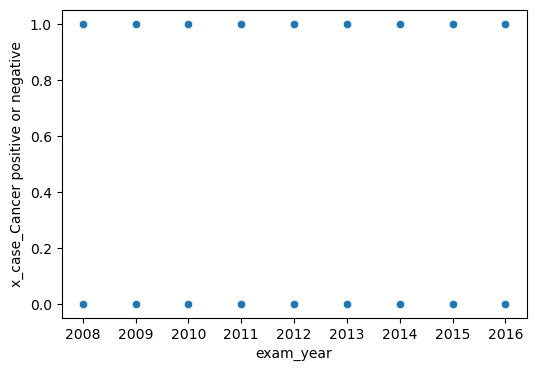

In [5]:
#scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='exam_year', y='x_case')
#plt.title('Scatter plot of exam_year vs. x_case')
plt.xlabel('exam_year')
plt.ylabel('x_case_Cancer positive or negative')
plt.show()


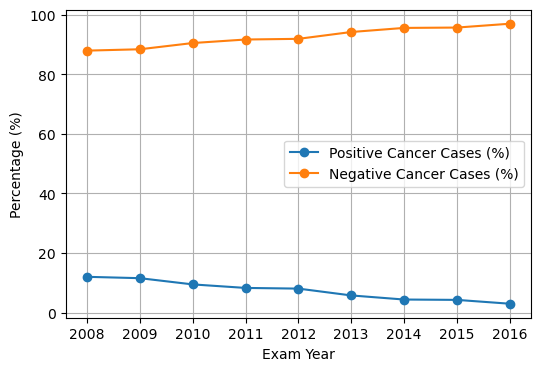

In [6]:

# Assuming your dataset is loaded in a DataFrame called 'data'
# and that 'x_case' indicates if the cancer is positive (1) or negative (0)

# Calculate the percentage of positive and negative cases per year
percentage_per_year = data.groupby(['exam_year', 'x_case']).size().unstack(fill_value=0)
percentage_per_year['total'] = percentage_per_year[0] + percentage_per_year[1]
percentage_per_year['positive_percentage'] = (percentage_per_year[1] / percentage_per_year['total']) * 100
percentage_per_year['negative_percentage'] = (percentage_per_year[0] / percentage_per_year['total']) * 100

# Plot the percentages
plt.figure(figsize=(6, 4))
plt.plot(percentage_per_year.index, percentage_per_year['positive_percentage'], marker='o', label='Positive Cancer Cases (%)')
plt.plot(percentage_per_year.index, percentage_per_year['negative_percentage'], marker='o', label='Negative Cancer Cases (%)')
#plt.title('Percentage of Positive and Negative Cancer Cases per Year')
plt.xlabel('Exam Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.show()


          Positive_Display Negative_Display
exam_year                                  
2008          708 (12.01%)    5188 (87.99%)
2009         1444 (11.55%)   11056 (88.45%)
2010          1136 (9.46%)   10872 (90.54%)
2011          1044 (8.28%)   11568 (91.72%)
2012          1028 (8.05%)   11744 (91.95%)
2013           760 (5.76%)   12444 (94.24%)
2014           488 (4.38%)   10652 (95.62%)
2015           468 (4.26%)   10516 (95.74%)
2016           228 (2.97%)    7444 (97.03%)


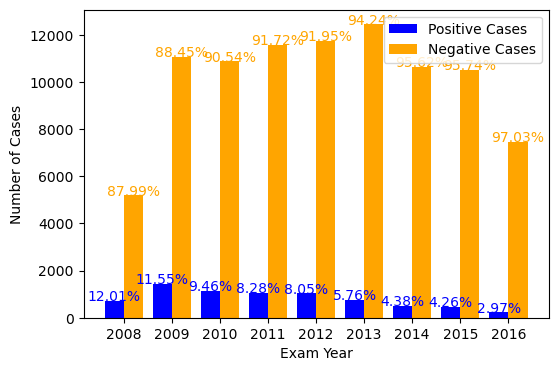

In [7]:

# Group data by exam year and x_case, and calculate the counts
counts_per_year = data.groupby(['exam_year', 'x_case']).size().unstack(fill_value=0)

# Rename the columns to make it clearer
counts_per_year.columns = ['Negative', 'Positive']

# Calculate total cases and percentages
counts_per_year['Total'] = counts_per_year['Negative'] + counts_per_year['Positive']
counts_per_year['Positive_Percentage'] = (counts_per_year['Positive'] / counts_per_year['Total']) * 100
counts_per_year['Negative_Percentage'] = (counts_per_year['Negative'] / counts_per_year['Total']) * 100

# Display the results in a readable format
counts_per_year['Positive_Display'] = counts_per_year['Positive'].astype(str) + " (" + counts_per_year['Positive_Percentage'].round(2).astype(str) + "%)"
counts_per_year['Negative_Display'] = counts_per_year['Negative'].astype(str) + " (" + counts_per_year['Negative_Percentage'].round(2).astype(str) + "%)"

# Display the results
print(counts_per_year[['Positive_Display', 'Negative_Display']])

# Plot the counts and percentages
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plotting the counts
ax1.bar(counts_per_year.index - 0.2, counts_per_year['Positive'], width=0.4, label='Positive Cases', color='blue')
ax1.bar(counts_per_year.index + 0.2, counts_per_year['Negative'], width=0.4, label='Negative Cases', color='orange')
ax1.set_xlabel('Exam Year')
ax1.set_ylabel('Number of Cases')
#ax1.set_title('Number and Percentage of Positive and Negative Cancer Cases per Year')
ax1.legend()

# Adding the percentage labels on top of the bars
for i, year in enumerate(counts_per_year.index):
    ax1.text(year - 0.2, counts_per_year.loc[year, 'Positive'] + 5, f"{counts_per_year.loc[year, 'Positive_Percentage']:.2f}%", ha='center', color='blue')
    ax1.text(year + 0.2, counts_per_year.loc[year, 'Negative'] + 5, f"{counts_per_year.loc[year, 'Negative_Percentage']:.2f}%", ha='center', color='orange')

plt.xticks(counts_per_year.index)
plt.show()



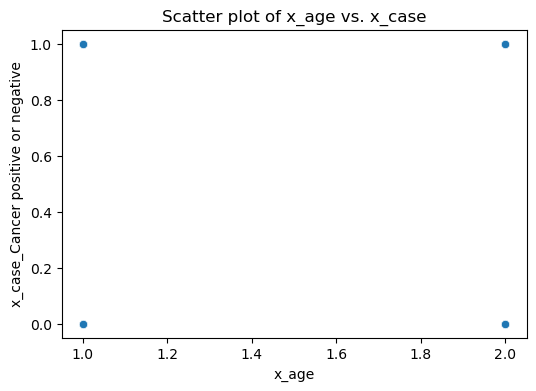

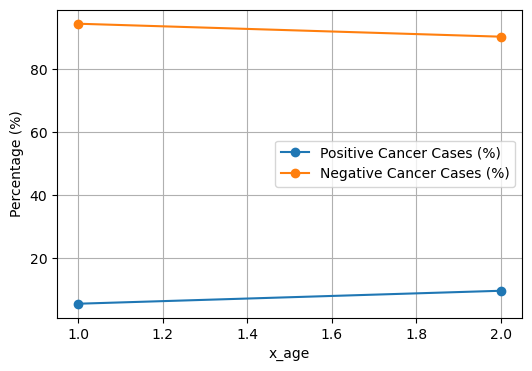

      Positive_Display Negative_Display
x_age                                  
1         2948 (5.51%)   50588 (94.49%)
2         4356 (9.63%)   40896 (90.37%)


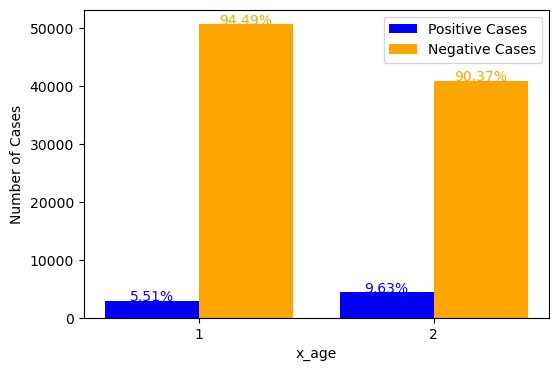

In [8]:
#scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='x_age', y='x_case')
plt.title('Scatter plot of x_age vs. x_case')
plt.xlabel('x_age')
plt.ylabel('x_case_Cancer positive or negative')
plt.show()

# Assuming your dataset is loaded in a DataFrame called 'data'
# and that 'x_case' indicates if the cancer is positive (1) or negative (0)

# Calculate the percentage of positive and negative cases per year
percentage_per_year = data.groupby(['x_age', 'x_case']).size().unstack(fill_value=0)
percentage_per_year['total'] = percentage_per_year[0] + percentage_per_year[1]
percentage_per_year['positive_percentage'] = (percentage_per_year[1] / percentage_per_year['total']) * 100
percentage_per_year['negative_percentage'] = (percentage_per_year[0] / percentage_per_year['total']) * 100

# Plot the percentages
plt.figure(figsize=(6, 4))
plt.plot(percentage_per_year.index, percentage_per_year['positive_percentage'], marker='o', label='Positive Cancer Cases (%)')
plt.plot(percentage_per_year.index, percentage_per_year['negative_percentage'], marker='o', label='Negative Cancer Cases (%)')
#plt.title('Percentage of Positive and Negative Cancer Cases per Year')
plt.xlabel('x_age')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.show()


# Group data by exam year and x_case, and calculate the counts
counts_per_year = data.groupby(['x_age', 'x_case']).size().unstack(fill_value=0)

# Rename the columns to make it clearer
counts_per_year.columns = ['Negative', 'Positive']

# Calculate total cases and percentages
counts_per_year['Total'] = counts_per_year['Negative'] + counts_per_year['Positive']
counts_per_year['Positive_Percentage'] = (counts_per_year['Positive'] / counts_per_year['Total']) * 100
counts_per_year['Negative_Percentage'] = (counts_per_year['Negative'] / counts_per_year['Total']) * 100

# Display the results in a readable format
counts_per_year['Positive_Display'] = counts_per_year['Positive'].astype(str) + " (" + counts_per_year['Positive_Percentage'].round(2).astype(str) + "%)"
counts_per_year['Negative_Display'] = counts_per_year['Negative'].astype(str) + " (" + counts_per_year['Negative_Percentage'].round(2).astype(str) + "%)"

# Display the results
print(counts_per_year[['Positive_Display', 'Negative_Display']])

# Plot the counts and percentages
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plotting the counts
ax1.bar(counts_per_year.index - 0.2, counts_per_year['Positive'], width=0.4, label='Positive Cases', color='blue')
ax1.bar(counts_per_year.index + 0.2, counts_per_year['Negative'], width=0.4, label='Negative Cases', color='orange')
ax1.set_xlabel('x_age')
ax1.set_ylabel('Number of Cases')
#ax1.set_title('Number and Percentage of Positive and Negative Cancer Cases per Year')
ax1.legend()

# Adding the percentage labels on top of the bars
for i, year in enumerate(counts_per_year.index):
    ax1.text(year - 0.2, counts_per_year.loc[year, 'Positive'] + 5, f"{counts_per_year.loc[year, 'Positive_Percentage']:.2f}%", ha='center', color='blue')
    ax1.text(year + 0.2, counts_per_year.loc[year, 'Negative'] + 5, f"{counts_per_year.loc[year, 'Negative_Percentage']:.2f}%", ha='center', color='orange')

plt.xticks(counts_per_year.index)
plt.show()





Unique values in x_case: ['Positive' 'Negative']


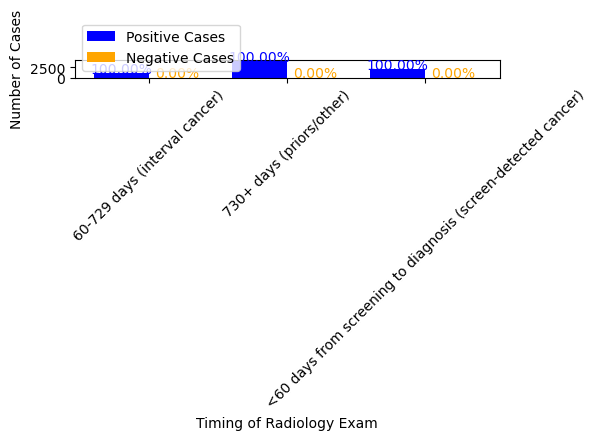

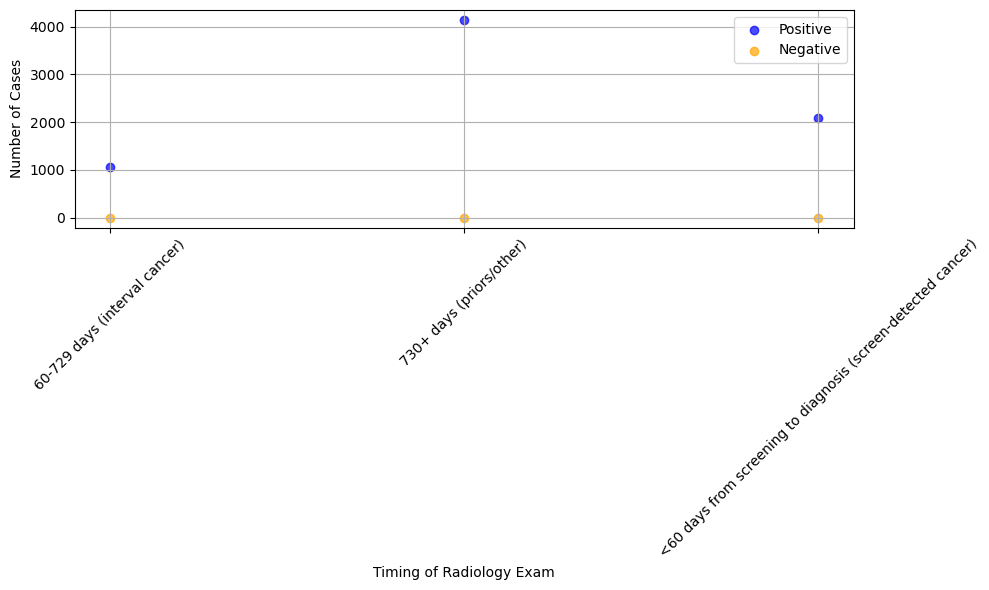

In [9]:

# Load your data
data = pd.read_csv('CSAW-CC_breast_cancer_screening_data.csv')

# Replace values as needed
data['rad_timing'] = data['rad_timing'].replace({
    1: '<60 days from screening to diagnosis (screen-detected cancer)',
    2: '60-729 days (interval cancer)',
    3: '730+ days (priors/other)'
})

data['x_case'] = data['x_case'].replace({
    1: 'Positive',
    0: 'Negative'
})

# Check the unique values in x_case
print("Unique values in x_case:", data['x_case'].unique())

# Count occurrences of positive and negative cases by rad_timing
counts_per_year = data.groupby(['rad_timing', 'x_case']).size().unstack(fill_value=0)

# Reindex to ensure both Positive and Negative columns are present
counts_per_year = counts_per_year.reindex(columns=['Positive', 'Negative'], fill_value=0)

# Calculate total counts and percentages
counts_per_year['total'] = counts_per_year['Negative'] + counts_per_year['Positive']
counts_per_year['Positive_Percentage'] = (counts_per_year['Positive'] / counts_per_year['total']) * 100
counts_per_year['Negative_Percentage'] = (counts_per_year['Negative'] / counts_per_year['total']) * 100

# Plotting the counts and percentages
fig, ax1 = plt.subplots(figsize=(6, 4))

# Define the positions for the bars
bar_width = 0.4
index = range(len(counts_per_year.index))

# Plotting the counts
ax1.bar([i - bar_width / 2 for i in index], counts_per_year['Positive'], width=bar_width, label='Positive Cases', color='blue')
ax1.bar([i + bar_width / 2 for i in index], counts_per_year['Negative'], width=bar_width, label='Negative Cases', color='orange')
ax1.set_xlabel('Timing of Radiology Exam')
ax1.set_ylabel('Number of Cases')
#ax1.set_title('Number and Percentage of Positive and Negative Cancer Cases per Timing of Radiology Exam')
ax1.set_xticks(index)
ax1.set_xticklabels(counts_per_year.index, rotation=45)  # Set labels to x-ticks and rotate for readability
ax1.legend()

# Adding the percentage labels on top of the bars
for i, year in enumerate(counts_per_year.index):
    ax1.text(i - bar_width / 2, counts_per_year.loc[year, 'Positive'] + 5, f"{counts_per_year.loc[year, 'Positive_Percentage']:.2f}%", ha='center', color='blue')
    ax1.text(i + bar_width / 2, counts_per_year.loc[year, 'Negative'] + 5, f"{counts_per_year.loc[year, 'Negative_Percentage']:.2f}%", ha='center', color='orange')

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


# Reset index to facilitate scatter plot creation
counts_per_year.reset_index(inplace=True)

# Melt the DataFrame to long format for scatter plotting
melted_counts = counts_per_year.melt(id_vars='rad_timing', value_vars=['Positive', 'Negative'],
                                      var_name='Case_Type', value_name='Count')

# Create the scatter plot
plt.figure(figsize=(10, 6))
colors = {'Positive': 'blue', 'Negative': 'orange'}

for case_type in ['Positive', 'Negative']:
    subset = melted_counts[melted_counts['Case_Type'] == case_type]
    plt.scatter(subset['rad_timing'], subset['Count'], label=case_type, color=colors[case_type], alpha=0.7)

#plt.title('Scatter Plot of Positive and Negative Cases by Radiology Exam Timing')
plt.xlabel('Timing of Radiology Exam')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.legend()
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


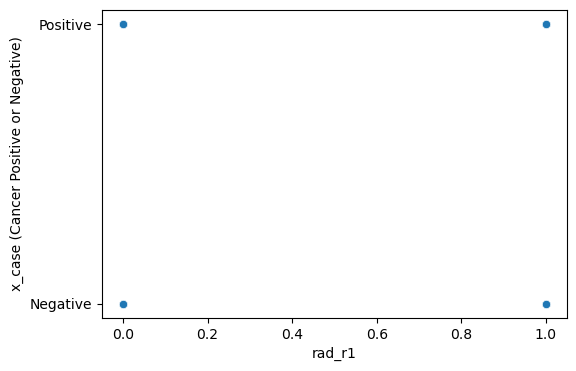

       Positive_Display Negative_Display
rad_r1                                  
0.0        4880 (5.67%)   81140 (94.33%)
1.0       1916 (40.08%)    2864 (59.92%)


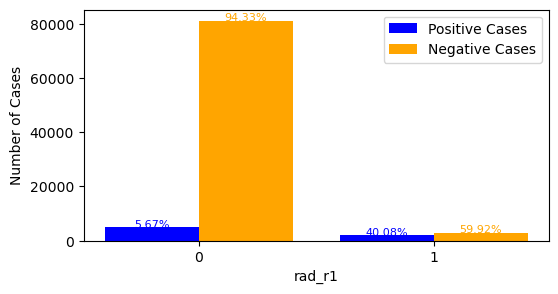

In [10]:

# Assuming your dataset is already loaded in a DataFrame called 'data'

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='rad_r1', y='x_case')
#plt.title('Scatter Plot of rad_r1 vs. x_case')
plt.xlabel('rad_r1')
plt.ylabel('x_case (Cancer Positive or Negative)')
plt.show()

# Group by 'rad_r1' and 'x_case' and calculate counts
counts_per_category = data.groupby(['rad_r1', 'x_case']).size().unstack(fill_value=0)

# Rename the columns for clarity
counts_per_category.columns = ['Negative', 'Positive']

# Calculate total cases and percentages
counts_per_category['Total'] = counts_per_category['Negative'] + counts_per_category['Positive']
counts_per_category['Positive_Percentage'] = (counts_per_category['Positive'] / counts_per_category['Total']) * 100
counts_per_category['Negative_Percentage'] = (counts_per_category['Negative'] / counts_per_category['Total']) * 100

# Display the results with percentage and count
counts_per_category['Positive_Display'] = counts_per_category['Positive'].astype(str) + " (" + counts_per_category['Positive_Percentage'].round(2).astype(str) + "%)"
counts_per_category['Negative_Display'] = counts_per_category['Negative'].astype(str) + " (" + counts_per_category['Negative_Percentage'].round(2).astype(str) + "%)"

# Print the results in a readable format
print(counts_per_category[['Positive_Display', 'Negative_Display']])

# Plot the counts and percentages
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plot the counts as bar charts
ax1.bar(counts_per_category.index - 0.2, counts_per_category['Positive'], width=0.4, label='Positive Cases', color='blue')
ax1.bar(counts_per_category.index + 0.2, counts_per_category['Negative'], width=0.4, label='Negative Cases', color='orange')
ax1.set_xlabel('rad_r1')
ax1.set_ylabel('Number of Cases')
#ax1.set_title('Number and Percentage of Positive and Negative Cancer Cases per rad_r1')
ax1.legend()

# Adding percentage labels on top of the bars
for i, category in enumerate(counts_per_category.index):
    ax1.text(category - 0.2, counts_per_category.loc[category, 'Positive'] + 5, 
             f"{counts_per_category.loc[category, 'Positive_Percentage']:.2f}%", 
             ha='center', color='blue', fontsize=8)
    ax1.text(category + 0.2, counts_per_category.loc[category, 'Negative'] + 5, 
             f"{counts_per_category.loc[category, 'Negative_Percentage']:.2f}%", 
             ha='center', color='orange', fontsize=8)

plt.xticks(counts_per_category.index)
plt.show()


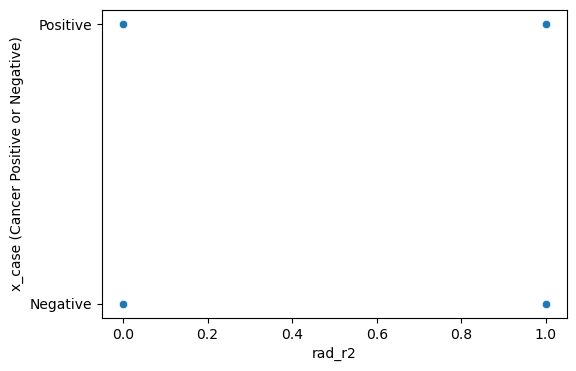

       Positive_Display Negative_Display
rad_r2                                  
0.0        4824 (5.59%)   81548 (94.41%)
1.0       1936 (44.32%)    2432 (55.68%)


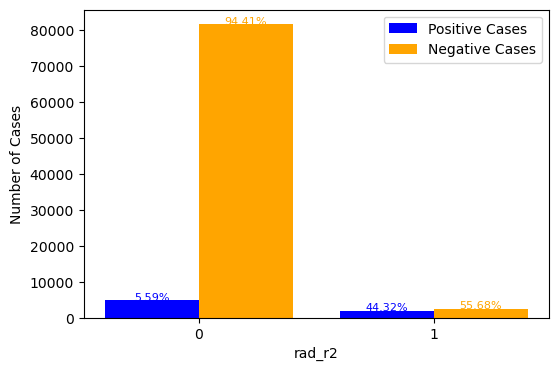

In [11]:

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='rad_r2', y='x_case')
#plt.title('Scatter Plot of rad_r2 vs. x_case')
plt.xlabel('rad_r2')
plt.ylabel('x_case (Cancer Positive or Negative)')
plt.show()

# Group by 'rad_r1' and 'x_case' and calculate counts
counts_per_category = data.groupby(['rad_r2', 'x_case']).size().unstack(fill_value=0)

# Rename the columns for clarity
counts_per_category.columns = ['Negative', 'Positive']

# Calculate total cases and percentages
counts_per_category['Total'] = counts_per_category['Negative'] + counts_per_category['Positive']
counts_per_category['Positive_Percentage'] = (counts_per_category['Positive'] / counts_per_category['Total']) * 100
counts_per_category['Negative_Percentage'] = (counts_per_category['Negative'] / counts_per_category['Total']) * 100

# Display the results with percentage and count
counts_per_category['Positive_Display'] = counts_per_category['Positive'].astype(str) + " (" + counts_per_category['Positive_Percentage'].round(2).astype(str) + "%)"
counts_per_category['Negative_Display'] = counts_per_category['Negative'].astype(str) + " (" + counts_per_category['Negative_Percentage'].round(2).astype(str) + "%)"

# Print the results in a readable format
print(counts_per_category[['Positive_Display', 'Negative_Display']])

# Plot the counts and percentages
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot the counts as bar charts
ax1.bar(counts_per_category.index - 0.2, counts_per_category['Positive'], width=0.4, label='Positive Cases', color='blue')
ax1.bar(counts_per_category.index + 0.2, counts_per_category['Negative'], width=0.4, label='Negative Cases', color='orange')
ax1.set_xlabel('rad_r2')
ax1.set_ylabel('Number of Cases')
#ax1.set_title('Number and Percentage of Positive and Negative Cancer Cases per rad_r2')
ax1.legend()

# Adding percentage labels on top of the bars
for i, category in enumerate(counts_per_category.index):
    ax1.text(category - 0.2, counts_per_category.loc[category, 'Positive'] + 5, 
             f"{counts_per_category.loc[category, 'Positive_Percentage']:.2f}%", 
             ha='center', color='blue', fontsize=8)
    ax1.text(category + 0.2, counts_per_category.loc[category, 'Negative'] + 5, 
             f"{counts_per_category.loc[category, 'Negative_Percentage']:.2f}%", 
             ha='center', color='orange', fontsize=8)

plt.xticks(counts_per_category.index)
plt.show()


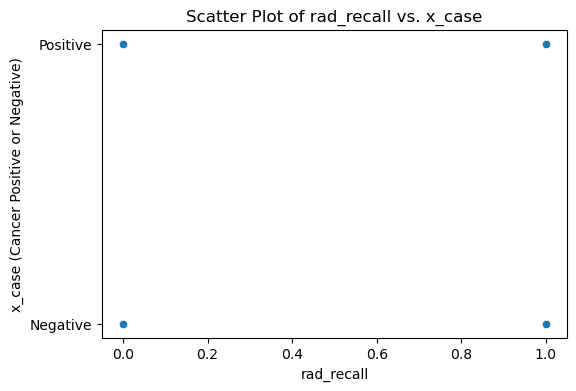

           Positive_Display Negative_Display
rad_recall                                  
0.0            4936 (5.63%)   82720 (94.37%)
1.0           1860 (59.69%)    1256 (40.31%)


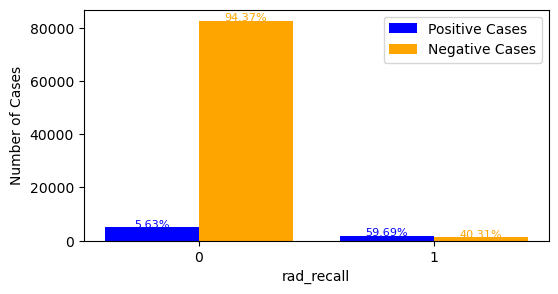

In [12]:

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='rad_recall', y='x_case')
plt.title('Scatter Plot of rad_recall vs. x_case')
plt.xlabel('rad_recall')
plt.ylabel('x_case (Cancer Positive or Negative)')
plt.show()

# Group by 'rad_r1' and 'x_case' and calculate counts
counts_per_category = data.groupby(['rad_recall', 'x_case']).size().unstack(fill_value=0)

# Rename the columns for clarity
counts_per_category.columns = ['Negative', 'Positive']

# Calculate total cases and percentages
counts_per_category['Total'] = counts_per_category['Negative'] + counts_per_category['Positive']
counts_per_category['Positive_Percentage'] = (counts_per_category['Positive'] / counts_per_category['Total']) * 100
counts_per_category['Negative_Percentage'] = (counts_per_category['Negative'] / counts_per_category['Total']) * 100

# Display the results with percentage and count
counts_per_category['Positive_Display'] = counts_per_category['Positive'].astype(str) + " (" + counts_per_category['Positive_Percentage'].round(2).astype(str) + "%)"
counts_per_category['Negative_Display'] = counts_per_category['Negative'].astype(str) + " (" + counts_per_category['Negative_Percentage'].round(2).astype(str) + "%)"

# Print the results in a readable format
print(counts_per_category[['Positive_Display', 'Negative_Display']])

# Plot the counts and percentages
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plot the counts as bar charts
ax1.bar(counts_per_category.index - 0.2, counts_per_category['Positive'], width=0.4, label='Positive Cases', color='blue')
ax1.bar(counts_per_category.index + 0.2, counts_per_category['Negative'], width=0.4, label='Negative Cases', color='orange')
ax1.set_xlabel('rad_recall')
ax1.set_ylabel('Number of Cases')
#ax1.set_title('Number and Percentage of Positive and Negative Cancer Cases per rad_recall')
ax1.legend()

# Adding percentage labels on top of the bars
for i, category in enumerate(counts_per_category.index):
    ax1.text(category - 0.2, counts_per_category.loc[category, 'Positive'] + 5, 
             f"{counts_per_category.loc[category, 'Positive_Percentage']:.2f}%", 
             ha='center', color='blue', fontsize=8)
    ax1.text(category + 0.2, counts_per_category.loc[category, 'Negative'] + 5, 
             f"{counts_per_category.loc[category, 'Negative_Percentage']:.2f}%", 
             ha='center', color='orange', fontsize=8)

plt.xticks(counts_per_category.index)
plt.show()

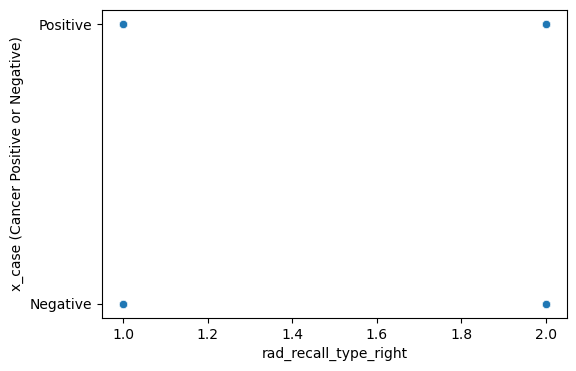

                      Positive_Display Negative_Display
rad_recall_type_right                                  
1.0                       876 (68.44%)     404 (31.56%)
2.0                        52 (21.31%)     192 (78.69%)


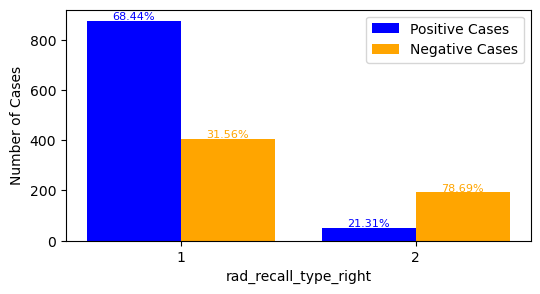

In [13]:
# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='rad_recall_type_right', y='x_case')
#plt.title('Scatter Plot of rad_recall_type_right vs. x_case')
plt.xlabel('rad_recall_type_right')
plt.ylabel('x_case (Cancer Positive or Negative)')
plt.show()

# Group by 'rad_r1' and 'x_case' and calculate counts
counts_per_category = data.groupby(['rad_recall_type_right', 'x_case']).size().unstack(fill_value=0)

# Rename the columns for clarity
counts_per_category.columns = ['Negative', 'Positive']

# Calculate total cases and percentages
counts_per_category['Total'] = counts_per_category['Negative'] + counts_per_category['Positive']
counts_per_category['Positive_Percentage'] = (counts_per_category['Positive'] / counts_per_category['Total']) * 100
counts_per_category['Negative_Percentage'] = (counts_per_category['Negative'] / counts_per_category['Total']) * 100

# Display the results with percentage and count
counts_per_category['Positive_Display'] = counts_per_category['Positive'].astype(str) + " (" + counts_per_category['Positive_Percentage'].round(2).astype(str) + "%)"
counts_per_category['Negative_Display'] = counts_per_category['Negative'].astype(str) + " (" + counts_per_category['Negative_Percentage'].round(2).astype(str) + "%)"

# Print the results in a readable format
print(counts_per_category[['Positive_Display', 'Negative_Display']])

# Plot the counts and percentages
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plot the counts as bar charts
ax1.bar(counts_per_category.index - 0.2, counts_per_category['Positive'], width=0.4, label='Positive Cases', color='blue')
ax1.bar(counts_per_category.index + 0.2, counts_per_category['Negative'], width=0.4, label='Negative Cases', color='orange')
ax1.set_xlabel('rad_recall_type_right')
ax1.set_ylabel('Number of Cases')
#ax1.set_title('Number and Percentage of Positive and Negative Cancer Cases per rad_recall_type_right')
ax1.legend()

# Adding percentage labels on top of the bars
for i, category in enumerate(counts_per_category.index):
    ax1.text(category - 0.2, counts_per_category.loc[category, 'Positive'] + 5, 
             f"{counts_per_category.loc[category, 'Positive_Percentage']:.2f}%", 
             ha='center', color='blue', fontsize=8)
    ax1.text(category + 0.2, counts_per_category.loc[category, 'Negative'] + 5, 
             f"{counts_per_category.loc[category, 'Negative_Percentage']:.2f}%", 
             ha='center', color='orange', fontsize=8)

plt.xticks(counts_per_category.index)
plt.show()

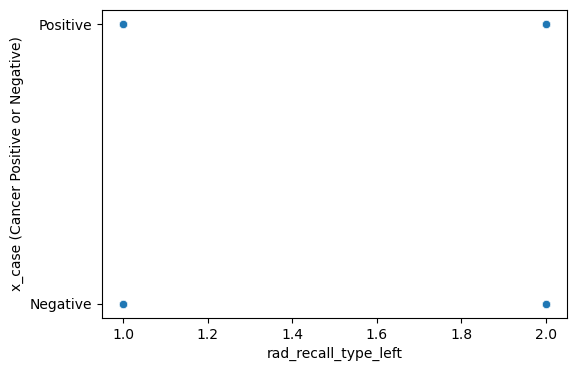

                     Positive_Display Negative_Display
rad_recall_type_left                                  
1.0                      936 (64.82%)     508 (35.18%)
2.0                       64 (22.86%)     216 (77.14%)


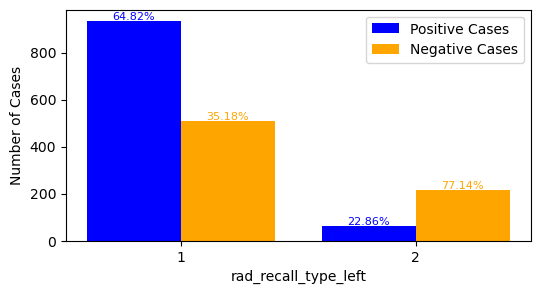

In [14]:
# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='rad_recall_type_left', y='x_case')
#plt.title('Scatter Plot of rad_recall_type_left vs. x_case')
plt.xlabel('rad_recall_type_left')
plt.ylabel('x_case (Cancer Positive or Negative)')
plt.show()

# Group by 'rad_r1' and 'x_case' and calculate counts
counts_per_category = data.groupby(['rad_recall_type_left', 'x_case']).size().unstack(fill_value=0)

# Rename the columns for clarity
counts_per_category.columns = ['Negative', 'Positive']

# Calculate total cases and percentages
counts_per_category['Total'] = counts_per_category['Negative'] + counts_per_category['Positive']
counts_per_category['Positive_Percentage'] = (counts_per_category['Positive'] / counts_per_category['Total']) * 100
counts_per_category['Negative_Percentage'] = (counts_per_category['Negative'] / counts_per_category['Total']) * 100

# Display the results with percentage and count
counts_per_category['Positive_Display'] = counts_per_category['Positive'].astype(str) + " (" + counts_per_category['Positive_Percentage'].round(2).astype(str) + "%)"
counts_per_category['Negative_Display'] = counts_per_category['Negative'].astype(str) + " (" + counts_per_category['Negative_Percentage'].round(2).astype(str) + "%)"

# Print the results in a readable format
print(counts_per_category[['Positive_Display', 'Negative_Display']])

# Plot the counts and percentages
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plot the counts as bar charts
ax1.bar(counts_per_category.index - 0.2, counts_per_category['Positive'], width=0.4, label='Positive Cases', color='blue')
ax1.bar(counts_per_category.index + 0.2, counts_per_category['Negative'], width=0.4, label='Negative Cases', color='orange')
ax1.set_xlabel('rad_recall_type_left')
ax1.set_ylabel('Number of Cases')
#ax1.set_title('Number and Percentage of Positive and Negative Cancer Cases per rad_recall_type_left')
ax1.legend()

# Adding percentage labels on top of the bars
for i, category in enumerate(counts_per_category.index):
    ax1.text(category - 0.2, counts_per_category.loc[category, 'Positive'] + 5, 
             f"{counts_per_category.loc[category, 'Positive_Percentage']:.2f}%", 
             ha='center', color='blue', fontsize=8)
    ax1.text(category + 0.2, counts_per_category.loc[category, 'Negative'] + 5, 
             f"{counts_per_category.loc[category, 'Negative_Percentage']:.2f}%", 
             ha='center', color='orange', fontsize=8)

plt.xticks(counts_per_category.index)
plt.show()

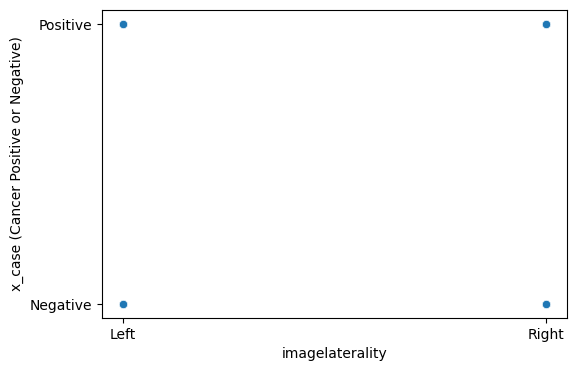

                Positive_Display Negative_Display
imagelaterality                                  
Left                3652 (7.39%)   45742 (92.61%)
Right               3652 (7.39%)   45742 (92.61%)


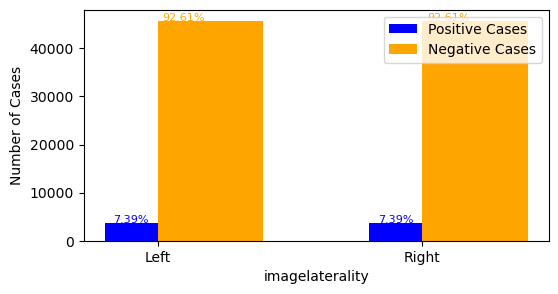

In [15]:

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='imagelaterality', y='x_case')
#plt.title('Scatter Plot of imagelaterality vs. x_case')
plt.xlabel('imagelaterality')
plt.ylabel('x_case (Cancer Positive or Negative)')
plt.show()

# Group by 'imagelaterality' and 'x_case' and calculate counts
counts_per_category = data.groupby(['imagelaterality', 'x_case']).size().unstack(fill_value=0)

# Rename the columns for clarity
counts_per_category.columns = ['Negative', 'Positive']

# Calculate total cases and percentages
counts_per_category['Total'] = counts_per_category['Negative'] + counts_per_category['Positive']
counts_per_category['Positive_Percentage'] = (counts_per_category['Positive'] / counts_per_category['Total']) * 100
counts_per_category['Negative_Percentage'] = (counts_per_category['Negative'] / counts_per_category['Total']) * 100

# Display the results with percentage and count
counts_per_category['Positive_Display'] = counts_per_category['Positive'].astype(str) + " (" + counts_per_category['Positive_Percentage'].round(2).astype(str) + "%)"
counts_per_category['Negative_Display'] = counts_per_category['Negative'].astype(str) + " (" + counts_per_category['Negative_Percentage'].round(2).astype(str) + "%)"

# Print the results in a readable format
print(counts_per_category[['Positive_Display', 'Negative_Display']])

# Plot the counts and percentages
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plot the counts as bar charts
ax1.bar(counts_per_category.index, counts_per_category['Positive'], width=0.4, label='Positive Cases', color='blue', align='center')
ax1.bar(counts_per_category.index, counts_per_category['Negative'], width=0.4, label='Negative Cases', color='orange', align='edge')
ax1.set_xlabel('imagelaterality')
ax1.set_ylabel('Number of Cases')
#ax1.set_title('Number and Percentage of Positive and Negative Cancer Cases per imagelaterality')
ax1.legend()

# Adding percentage labels on top of the bars
for i, category in enumerate(counts_per_category.index):
    ax1.text(i - 0.1, counts_per_category.loc[category, 'Positive'] + 5, 
             f"{counts_per_category.loc[category, 'Positive_Percentage']:.2f}%", 
             ha='center', color='blue', fontsize=8)
    ax1.text(i + 0.1, counts_per_category.loc[category, 'Negative'] + 5, 
             f"{counts_per_category.loc[category, 'Negative_Percentage']:.2f}%", 
             ha='center', color='orange', fontsize=8)

plt.xticks(range(len(counts_per_category.index)), counts_per_category.index)
plt.show()


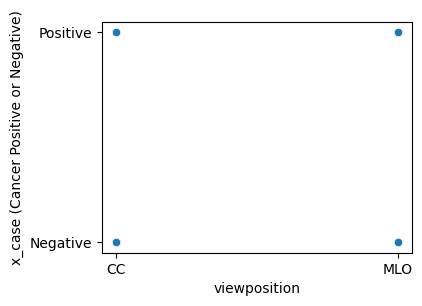

             Positive_Display Negative_Display
viewposition                                  
CC               3652 (7.39%)   45742 (92.61%)
MLO              3652 (7.39%)   45742 (92.61%)


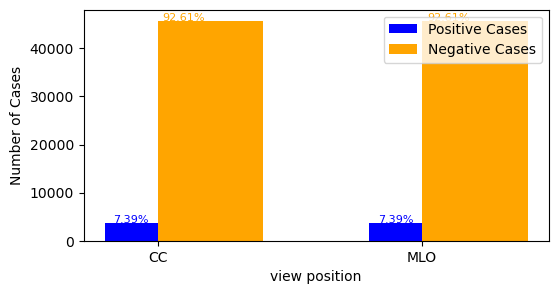

In [16]:

# Scatter plot
plt.figure(figsize=(4, 3))
sns.scatterplot(data=data, x='viewposition', y='x_case')
#plt.title('Scatter Plot of viewposition vs. x_case')
plt.xlabel('viewposition')
plt.ylabel('x_case (Cancer Positive or Negative)')
plt.show()

# Group by 'imagelaterality' and 'x_case' and calculate counts
counts_per_category = data.groupby(['viewposition', 'x_case']).size().unstack(fill_value=0)

# Rename the columns for clarity
counts_per_category.columns = ['Negative', 'Positive']

# Calculate total cases and percentages
counts_per_category['Total'] = counts_per_category['Negative'] + counts_per_category['Positive']
counts_per_category['Positive_Percentage'] = (counts_per_category['Positive'] / counts_per_category['Total']) * 100
counts_per_category['Negative_Percentage'] = (counts_per_category['Negative'] / counts_per_category['Total']) * 100

# Display the results with percentage and count
counts_per_category['Positive_Display'] = counts_per_category['Positive'].astype(str) + " (" + counts_per_category['Positive_Percentage'].round(2).astype(str) + "%)"
counts_per_category['Negative_Display'] = counts_per_category['Negative'].astype(str) + " (" + counts_per_category['Negative_Percentage'].round(2).astype(str) + "%)"

# Print the results in a readable format
print(counts_per_category[['Positive_Display', 'Negative_Display']])

# Plot the counts and percentages
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plot the counts as bar charts
ax1.bar(counts_per_category.index, counts_per_category['Positive'], width=0.4, label='Positive Cases', color='blue', align='center')
ax1.bar(counts_per_category.index, counts_per_category['Negative'], width=0.4, label='Negative Cases', color='orange', align='edge')
ax1.set_xlabel('view position')
ax1.set_ylabel('Number of Cases')
#ax1.set_title('Number and Percentage of Positive and Negative Cancer Cases per viewposition')
ax1.legend()

# Adding percentage labels on top of the bars
for i, category in enumerate(counts_per_category.index):
    ax1.text(i - 0.1, counts_per_category.loc[category, 'Positive'] + 5, 
             f"{counts_per_category.loc[category, 'Positive_Percentage']:.2f}%", 
             ha='center', color='blue', fontsize=8)
    ax1.text(i + 0.1, counts_per_category.loc[category, 'Negative'] + 5, 
             f"{counts_per_category.loc[category, 'Negative_Percentage']:.2f}%", 
             ha='center', color='orange', fontsize=8)

plt.xticks(range(len(counts_per_category.index)), counts_per_category.index)
plt.show()


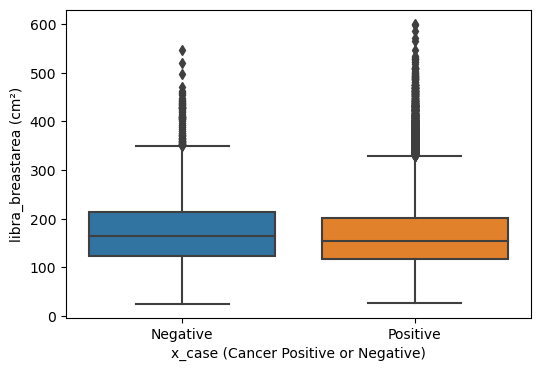

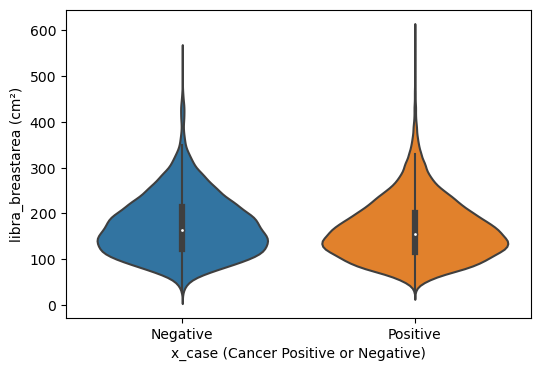

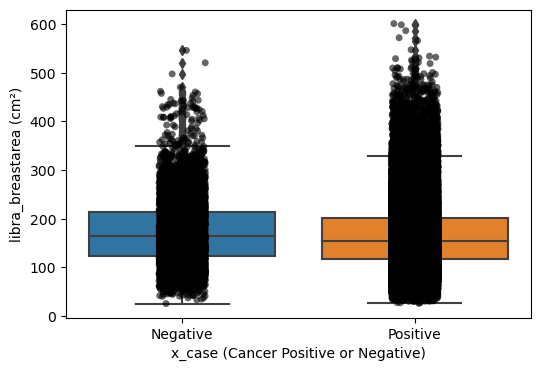

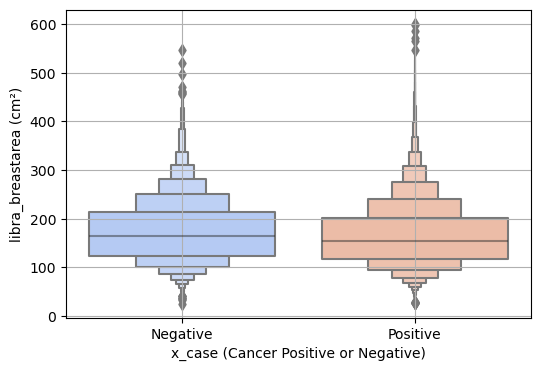

In [17]:

# Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='x_case', y='libra_breastarea')
#plt.title('Box Plot of libra_breastarea by x_case')
plt.xlabel('x_case (Cancer Positive or Negative)')
plt.ylabel('libra_breastarea (cm²)')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Violin Plot
plt.figure(figsize=(6, 4))
sns.violinplot(data=data, x='x_case', y='libra_breastarea')
#plt.title('Violin Plot of libra_breastarea by x_case')
plt.xlabel('x_case (Cancer Positive or Negative)')
plt.ylabel('libra_breastarea (cm²)')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Box and Strip Plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='x_case', y='libra_breastarea', whis=1.5)
sns.stripplot(data=data, x='x_case', y='libra_breastarea', color='black', alpha=0.6)
#plt.title('Box and Strip Plot of libra_breastarea by x_case')
plt.xlabel('x_case (Cancer Positive or Negative)')
plt.ylabel('libra_breastarea (cm²)')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Boxen Plot
plt.figure(figsize=(6, 4))
sns.boxenplot(data=data, x='x_case', y='libra_breastarea', palette="coolwarm")
#plt.title('Boxen Plot of libra_breastarea by x_case')
plt.xlabel('x_case (Cancer Positive or Negative)')
plt.ylabel('libra_breastarea (cm²)')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.grid(True)
plt.show()





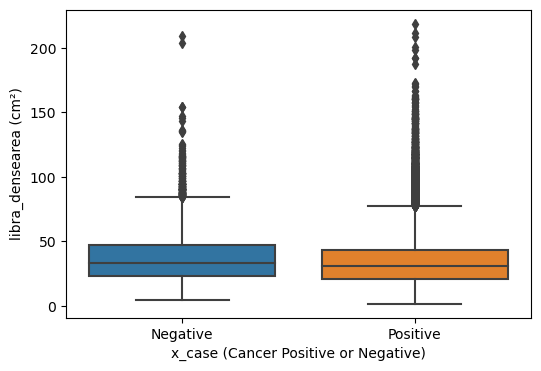

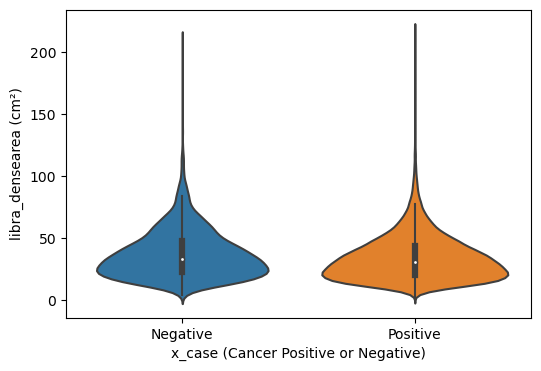

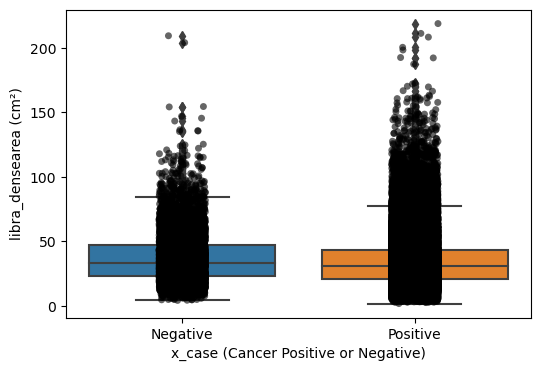

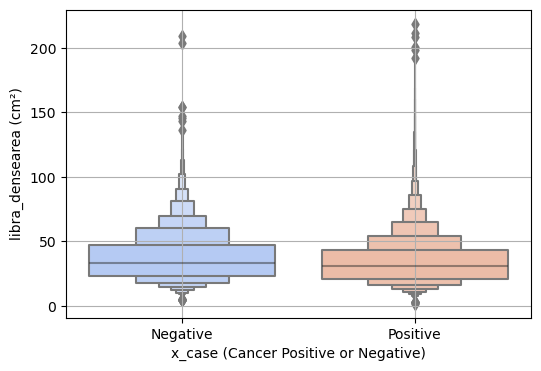

In [18]:

# Box Plot
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='x_case', y='libra_densearea')
#plt.title('Box Plot of libra_densearea by x_case')
plt.xlabel('x_case (Cancer Positive or Negative)')
plt.ylabel('libra_densearea (cm²)')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Violin Plot
plt.figure(figsize=(6, 4))
sns.violinplot(data=data, x='x_case', y='libra_densearea')
#plt.title('Violin Plot of libra_densearea by x_case')
plt.xlabel('x_case (Cancer Positive or Negative)')
plt.ylabel('libra_densearea (cm²)')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Box and Strip Plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='x_case', y='libra_densearea', whis=1.5)
sns.stripplot(data=data, x='x_case', y='libra_densearea', color='black', alpha=0.6)
#plt.title('Box and Strip Plot of libra_densearea by x_case')
plt.xlabel('x_case (Cancer Positive or Negative)')
plt.ylabel('libra_densearea (cm²)')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Boxen Plot
plt.figure(figsize=(6, 4))
sns.boxenplot(data=data, x='x_case', y='libra_densearea', palette="coolwarm")
#plt.title('Boxen Plot of libra_densearea by x_case')
plt.xlabel('x_case (Cancer Positive or Negative)')
plt.ylabel('libra_densearea (cm²)')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.grid(True)
plt.show()


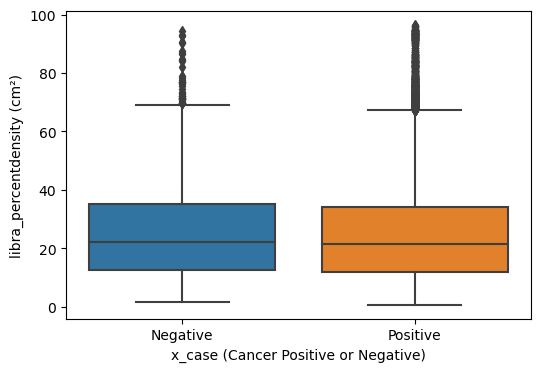

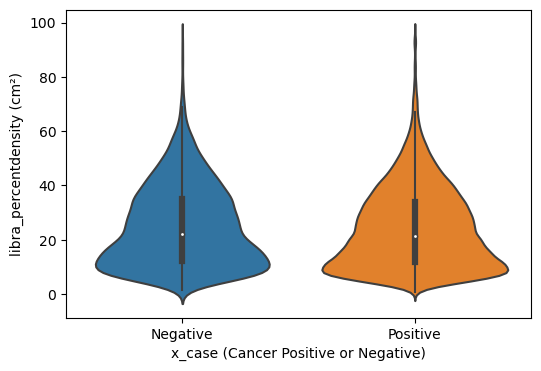

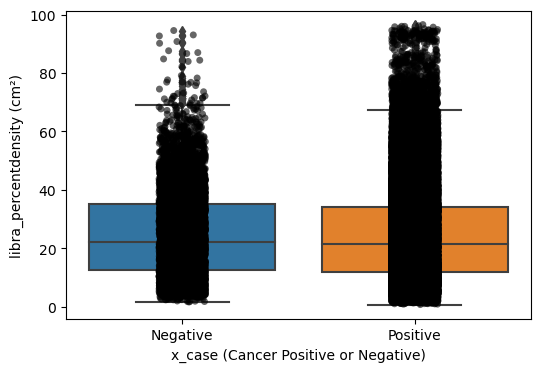

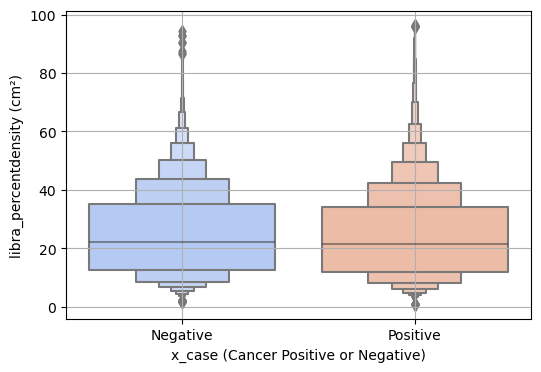

In [19]:

# Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='x_case', y='libra_percentdensity')
#plt.title('Box Plot of libra_percentdensity by x_case')
plt.xlabel('x_case (Cancer Positive or Negative)')
plt.ylabel('libra_percentdensity (cm²)')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Violin Plot
plt.figure(figsize=(6, 4))
sns.violinplot(data=data, x='x_case', y='libra_percentdensity')
#plt.title('Violin Plot of libra_percentdensity by x_case')
plt.xlabel('x_case (Cancer Positive or Negative)')
plt.ylabel('libra_percentdensity (cm²)')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Box and Strip Plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='x_case', y='libra_percentdensity', whis=1.5)
sns.stripplot(data=data, x='x_case', y='libra_percentdensity', color='black', alpha=0.6)
#plt.title('Box and Strip Plot of libra_percentdensity by x_case')
plt.xlabel('x_case (Cancer Positive or Negative)')
plt.ylabel('libra_percentdensity (cm²)')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Boxen Plot
plt.figure(figsize=(6, 4))
sns.boxenplot(data=data, x='x_case', y='libra_percentdensity', palette="coolwarm")
#plt.title('Boxen Plot of libra_percentdensity by x_case')
plt.xlabel('x_case (Cancer Positive or Negative)')
plt.ylabel('libra_percentdensity (cm²)')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.grid(True)
plt.show()
